[[False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]]
[[False False False False]
 [False False  True False]
 [False False False False]
 [False False False False]
 [ True False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False  True False False]
 [False False False False]
 [False False False False]
 [False False False  True]
 [False False False False]]
[[False False False False]
 [False False  True False]
 [False False  True False]
 [False False False False]
 [ True False False False]

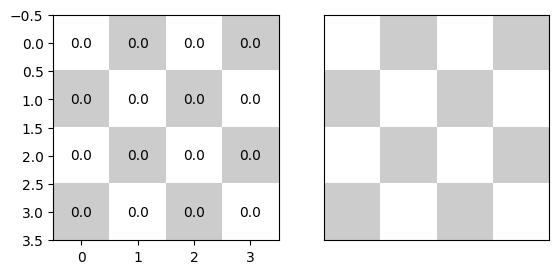

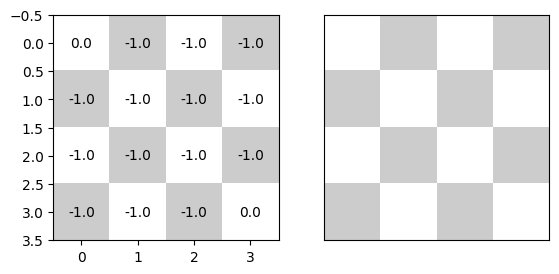

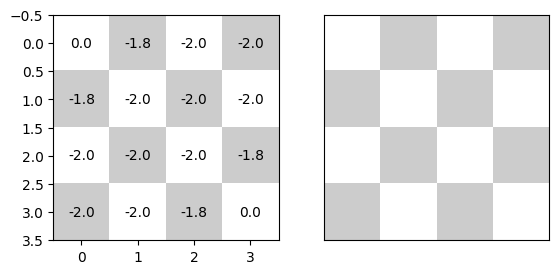

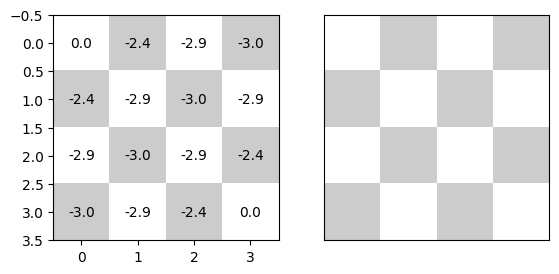

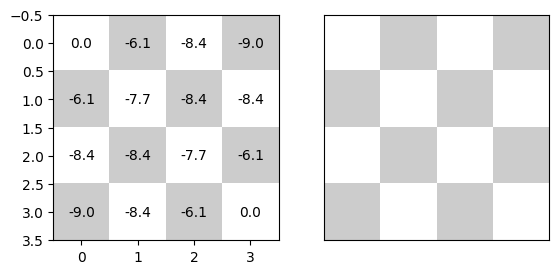

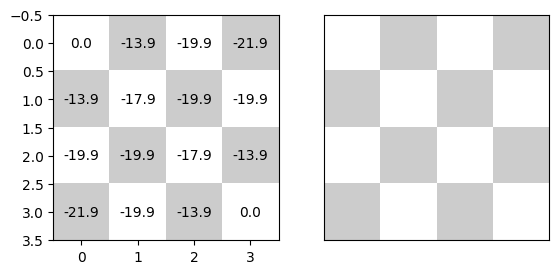

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import profile

'''
num_nonterminal_states = 14
num_terminal_states = 1
num_states = num_nonterminal_states + num_terminal_states
num_actions = 4 # up down right left

action_state_transition = np.array([
    [0,4,1,14],#0
    [1,5,2,0],#1
    [2,6,2,1],#2

    [14,7,4,3],#3
    [0,8,5,3],#4
    [1,9,6,4],#5
    [2,10,6,5],#6
    
    [3,11,8,7],#7
    [4,12,9,7],#8
    [5,13,10,8],#9
    [6,14,10,9],#10
    
    [7,11,12,11],#11
    [8,12,13,11],#12
    [9,13,14,12],#13 
])


def evaluate_policy(gamma, theta):
    values = np.zeros(num_states)
    while True:
        delta = 0.0
        for s in range(num_nonterminal_states):
            #v = values[s]
            v_new = 0.0
            for a in range(num_actions):
                v_prime = values[action_state_transition[s,a]]
                v_new += (-1 + gamma*v_prime)
            v_new /= float(num_actions)
            delta = max(delta, abs(v_new - values[s]))
            values[s] = v_new
        if delta < theta:
            break
    return values

values = evaluate_policy(1, 0.0000001)
show_values = np.zeros(16)
show_values[0] = 0
show_values[1:] = values
show_values = show_values.reshape((4,4))
show_values
'''

grid_size = 4
num_states = grid_size * grid_size
num_actions = 4 # up down right left
action_state_transition = np.zeros((grid_size * grid_size,  num_actions),dtype=int)
for y in range(grid_size):
    for x in range(grid_size):
        if y == 0:
            up =  y * grid_size + x
        else:
            up = (y-1) * grid_size + x
        if y == grid_size - 1:
            down =  y * grid_size + x
        else:
            down = (y+1) * grid_size + x
        if x == 0: 
            left =  y * grid_size + x
        else: 
            left = y * grid_size + x - 1
        if x == grid_size - 1:
            right =  y * grid_size + x
        else:
            right = y * grid_size + x + 1
        action_state_transition[y * grid_size + x] = [left, right, down, up]
action_state_transition[0] = 0
action_state_transition[num_states-1] = num_states-1

def evaluate_policy(gamma, epochs):
    values = np.zeros(num_states)
    new_values = np.zeros(num_states)
    for _ in range(epochs):
        #delta = 0.0
        for s in range(1, num_states - 1):
            v_new = 0.0
            for a in range(num_actions):
                v_prime = values[action_state_transition[s,a]]
                v_new += (-1 + gamma * v_prime)
            v_new /= float(num_actions)
            #delta = max(delta, abs(v_new - values[s]))
            new_values[s] = v_new
        values = new_values.copy()
    return values

def value_to_policy(values):
    policy = np.zeros((num_states, num_actions), dtype = bool)
    for s in range(1, num_states - 1):
        for a in range(num_actions):
            s_prime = action_state_transition[s, a]
            if values[s_prime] > values[s]:
                policy[s, a] = True
    return policy

arrows = ["←", "→", "↑", "↓"]

def test(epochs):
    values = evaluate_policy(1, epochs)
    policy = value_to_policy(values)
    print(policy)
    show_values = values.reshape(grid_size, grid_size)

    fig, (ax,ax1) = plt.subplots(1,2)
    plt.xticks([])
    plt.yticks([])
    board = np.ones((grid_size, grid_size, 3))
    board[1::2, ::2] = 0.8
    board[::2, 1::2] = 0.8
    ax.imshow(board)
    for i in range(grid_size):
        for j in range(grid_size):
            text = ax.text(j, i, f"{show_values[i, j]:.1f}",
                        ha="center", va="center", color=(0,0,0))

    ax1.imshow(board)

for n in [0,1,2,3,10,100]:
    test(n)